In [1]:
import POIO as po
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib agg
import matplotlib.gridspec as gridspec
from astro import constants as c
import healpy as hp
from astropy.convolution import convolve, Gaussian1DKernel
import matplotlib as mpl

In [2]:
#### User section ###########
line = 1260.42
fig_size = [8,8]
colors = ['blue','green','orange','purple']
#############################

In [3]:
k = np.zeros((5,3))
k[0,:] = [0.5, -0.866, 0.00]
k[1,:] = [0.45, -0.78, 0.44]
k[2,:] = [0.78, 0.45, 0.44]
k[3,:] = [0.72, 0.181, -0.67]
k[4,:] = [-0.48, -0.2, 0.85]

In [4]:
#Save v_cm for 107 : [-16.9071216  -42.91193192  43.09063188], in km/s
v_cm = [-16.9071216, -42.91193192, 43.09063188]

# Fiducial

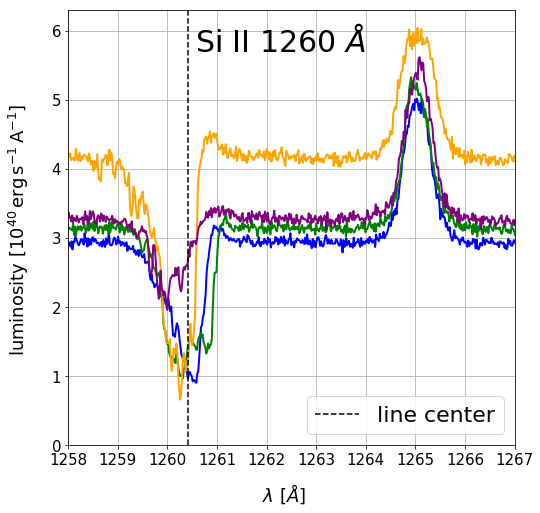

In [8]:
fig, ax = plt.subplots(1, 1, figsize=fig_size)
# fig.suptitle('SiII 1260 A', size = 30, weight='bold')
fig.text(0.5, 0.04, r'$\lambda$ [$\AA$]', va='center', ha='center', fontsize=18)
fig.text(0.04, 0.5, r'luminosity [$10^{40} \, \rm{erg} \, \rm{s}^{-1} \, \rm{A}^{-1}$]', \
         va='center', ha='center', rotation='vertical', fontsize=18)

for i in range(4):
    kobs = k[i,:]
    a = po.mockobs('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/', 'output_fid.out', 'IC_photons.ic', load_spectrum=True, idirection=i+1)
    spec_peeloff = a.spec[1:-1]
    l_peeloff = np.linspace(a.spec_lmin,a.spec_lmax,num=a.spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
    v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    Fcont = np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
#     print(Fcont)
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/c.c_cgs*1e5*line
    
    ax.plot(l_peeloff,spec_peeloff/1e40, linewidth=2, color=colors[i])
    ax.set_xlim(1258,1267)
    ax.set_ylim(0.0, 6.3)
    ax.tick_params(labelsize=15)
#     ax.axhline(Fcont,color='deeppink',linestyle='--', label='Continuum level')
ax.axvline(line,color='black',linestyle='--', label='line center')
ax.legend(loc='lower right',fontsize=22)
ax.grid()
plt.annotate(r'Si II 1260 $\AA$', xy=(1260.56, 5.7), fontsize=30)#, weight='bold')
# plt.savefig('/home/cral/mauerhofer/figures/paper/spectra/SiII_1260_fluo.pdf')
plt.show()



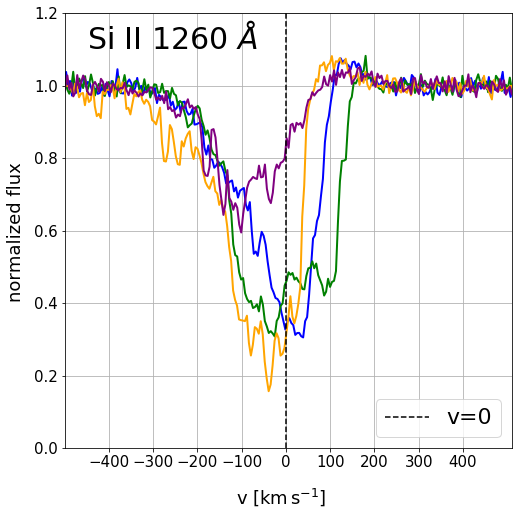

In [19]:
fig, ax = plt.subplots(1, 1, figsize=fig_size)
# fig.suptitle('SiII 1260 A', size = 30, weight='bold')
fig.text(0.5, 0.04, r'v [$\rm{km} \, \rm{s}^{-1}$]', va='center', ha='center', fontsize=18)
fig.text(0.04, 0.5, r'normalized flux', va='center', ha='center', rotation='vertical', fontsize=18)

for i in range(4):
    kobs = k[i,:]
    a = po.mockobs('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/', 'output_fid.out', 'IC_photons.ic', load_spectrum=True, idirection=i+1)
    spec_peeloff = a.spec[1:-1]
    l_peeloff = np.linspace(a.spec_lmin,a.spec_lmax,num=a.spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
    v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    Fcont = np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
#     print(Fcont)
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/c.c_cgs*1e5*line
    
    ax.plot(v_peeloff,spec_peeloff/Fcont, linewidth=2, color=colors[i])
    ax.set_xlim(-499,510)
    ax.set_ylim(0.0, 1.2)
    ax.tick_params(labelsize=15)
# ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
ax.axvline(0,color='black',linestyle='--', label='v=0')
ax.legend(loc='lower right',fontsize=22)
grid_x_ticks = np.arange(-400, 401, 100)
ax.set_xticks(grid_x_ticks)
ax.grid()
plt.annotate(r'Si II 1260 $\AA$', xy=(-450, 1.1), fontsize=30)#, weight='bold')
# plt.savefig('/home/cral/mauerhofer/figures/paper/spectra/SiII_1260_abs.pdf')
plt.show()




## Line properties

In [61]:
EW_abs = np.zeros(5)
EW_fluo = np.zeros(5)
v_max = np.zeros(5)
v_center = np.zeros(5)
v90 = np.zeros(5)
res_flux = np.zeros(5)
Fcont = np.zeros(5)

In [62]:
for idir in range(5):
    a = po.mockobs('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/','output_fid.out','IC_photons.ic',load_spectrum=True,idirection=idir+1)
    spec_peeloff = a.spec
    l_peeloff = np.linspace(a.spec_lmin,a.spec_lmax,num=a.spec_npix)
    v_peeloff = (l_peeloff-line)/line*c.c_cgs*1e-5
#     v_peeloff = v_peeloff + np.dot(directions_new_181[idir,:],v_cm_181)

    Fcont[idir] = np.average(spec_peeloff[np.where((l_peeloff>1257) & (l_peeloff<1259))])
#     print(Fcont)
    ratio = (Fcont[idir] - spec_peeloff)/Fcont[idir]
    EW_abs[idir] = np.trapz(ratio[(l_peeloff>1259)&(l_peeloff<1262)],l_peeloff[(l_peeloff>1259)&(l_peeloff<1262)])
    EW_fluo[idir] = np.trapz(ratio[(l_peeloff>1263)&(l_peeloff<1267)],l_peeloff[(l_peeloff>1263)&(l_peeloff<1267)])
    
    min_index = np.argmin(spec_peeloff[(l_peeloff>1259)&(l_peeloff<1262)])
    v_max[idir] = v_peeloff[(l_peeloff>1259)&(l_peeloff<1263)][min_index]
    if(np.trapz(ratio[(l_peeloff>1259)&(l_peeloff<1262)][0:min_index],l_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][0:min_index]) > EW_abs[idir]/2):
        for j in range(min_index-1,0,-1):
            if(np.trapz(ratio[(l_peeloff>1259)&(l_peeloff<1262)][0:j],l_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][0:j]) < EW_abs[idir]/2):
                center_index = j
                v_center[idir] = v_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][center_index]
                break
    else:
        for j in range(min_index,1000):
            if(np.trapz(ratio[(l_peeloff>1259)&(l_peeloff<1262)][0:j],l_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][0:j]) >= EW_abs[idir]/2):
                center_index = j
                v_center[idir] = v_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][center_index]
                break

            
    res_flux[idir] = spec_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][min_index]/Fcont[idir]
    
    for j in range(min(center_index,min_index),0,-1):
        if(spec_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][j] > 0.9*Fcont[idir]):
            v90[idir] = v_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][j]
            break

In [12]:
print(res_flux)

[0.30614226 0.30851894 0.15848959 0.59605013 0.31377993]


# No gas velocity

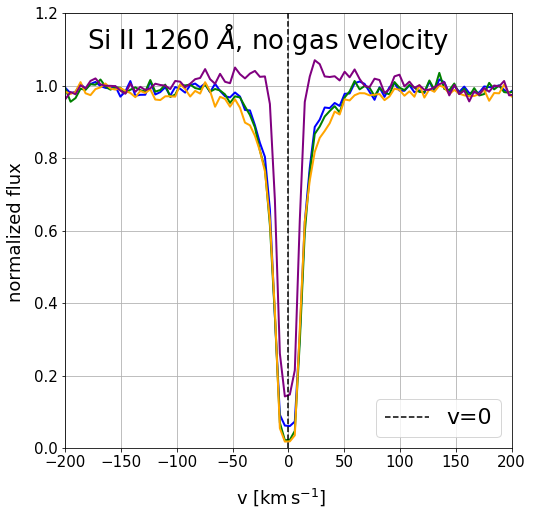

In [16]:
fig, ax = plt.subplots(1, 1, figsize=fig_size)
# fig.suptitle('SiII 1260 A', size = 30, weight='bold')
fig.text(0.5, 0.04, r'v [$\rm{km} \, \rm{s}^{-1}$]', va='center', ha='center', fontsize=18)
fig.text(0.04, 0.5, r'normalized flux', va='center', ha='center', rotation='vertical', fontsize=18)

for i in range(4):
    kobs = k[i,:]
    a = po.mockobs('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/', 'output_nov.out', 'IC_photons.ic', load_spectrum=True, idirection=i+1)
    spec_peeloff = a.spec[1:-1]
    l_peeloff = np.linspace(a.spec_lmin,a.spec_lmax,num=a.spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
#     v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    Fcont = np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
#     print(Fcont)
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/c.c_cgs*1e5*line
    
    ax.plot(v_peeloff,spec_peeloff/Fcont, linewidth=2, color=colors[i])
    ax.set_xlim(-200,200)
    ax.set_ylim(0.0, 1.2)
    ax.tick_params(labelsize=15)
# ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
ax.axvline(0,color='black',linestyle='--', label='v=0')
ax.legend(loc='lower right',fontsize=22)
# grid_x_ticks = np.arange(-400, 401, 100)
# ax.set_xticks(grid_x_ticks)
ax.grid()
plt.annotate(r'Si II 1260 $\AA$, no gas velocity', xy=(-180, 1.1), fontsize=26)#, weight='bold')
plt.savefig('/home/cral/mauerhofer/figures/paper/spectra/SiII_1260_nov.pdf')
plt.show()





# With turbulent velocity of 10 km/s

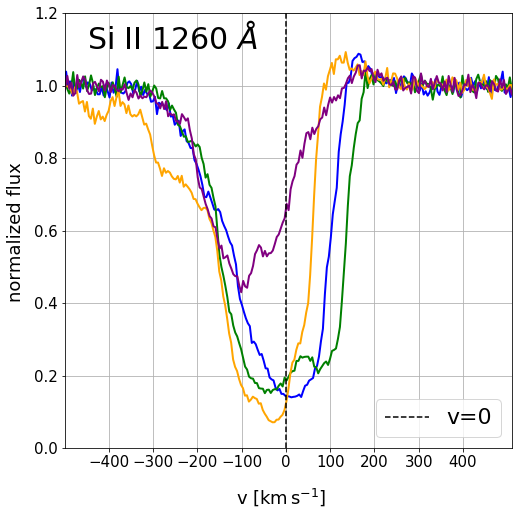

In [18]:
fig, ax = plt.subplots(1, 1, figsize=fig_size)
# fig.suptitle('SiII 1260 A', size = 30, weight='bold')
fig.text(0.5, 0.04, r'v [$\rm{km} \, \rm{s}^{-1}$]', va='center', ha='center', fontsize=18)
fig.text(0.04, 0.5, r'normalized flux', va='center', ha='center', rotation='vertical', fontsize=18)

for i in range(4):
    kobs = k[i,:]
    a = po.mockobs('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/', 'output_fid_vturb20.out', 'IC_photons.ic', load_spectrum=True, idirection=i+1)
    spec_peeloff = a.spec[1:-1]
    l_peeloff = np.linspace(a.spec_lmin,a.spec_lmax,num=a.spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
    v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    Fcont = np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
#     print(Fcont)
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/c.c_cgs*1e5*line
    
    ax.plot(v_peeloff,spec_peeloff/Fcont, linewidth=2, color=colors[i])
    ax.set_xlim(-499,510)
    ax.set_ylim(0.0, 1.2)
    ax.tick_params(labelsize=15)
# ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
ax.axvline(0,color='black',linestyle='--', label='v=0')
ax.legend(loc='lower right',fontsize=22)
grid_x_ticks = np.arange(-400, 401, 100)
ax.set_xticks(grid_x_ticks)
ax.grid()
plt.annotate(r'Si II 1260 $\AA$', xy=(-450, 1.1), fontsize=30)#, weight='bold')
plt.savefig('/home/cral/mauerhofer/figures/paper/spectra/SiII_1260_abs_vturb.pdf')
plt.show()



## Line properties

In [19]:
EW_abs = np.zeros(5)
EW_fluo = np.zeros(5)
v_max = np.zeros(5)
v_center = np.zeros(5)
v90 = np.zeros(5)
res_flux = np.zeros(5)
Fcont = np.zeros(5)

In [22]:
for idir in range(5):
    a = po.mockobs('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/','output_fid_vturb20.out','IC_photons.ic',load_spectrum=True,idirection=idir+1)
    spec_peeloff = a.spec
    l_peeloff = np.linspace(a.spec_lmin,a.spec_lmax,num=a.spec_npix)
    v_peeloff = (l_peeloff-line)/line*c.c_cgs*1e-5
#     v_peeloff = v_peeloff + np.dot(directions_new_181[idir,:],v_cm_181)

    Fcont[idir] = np.average(spec_peeloff[np.where((l_peeloff>1257) & (l_peeloff<1259))])
#     print(Fcont)
    ratio = (Fcont[idir] - spec_peeloff)/Fcont[idir]
    EW_abs[idir] = np.trapz(ratio[(l_peeloff>1259)&(l_peeloff<1262)],l_peeloff[(l_peeloff>1259)&(l_peeloff<1262)])
    EW_fluo[idir] = np.trapz(ratio[(l_peeloff>1263)&(l_peeloff<1267)],l_peeloff[(l_peeloff>1263)&(l_peeloff<1267)])
    
    min_index = np.argmin(spec_peeloff[(l_peeloff>1259)&(l_peeloff<1262)])
    v_max[idir] = v_peeloff[(l_peeloff>1259)&(l_peeloff<1263)][min_index]
    if(np.trapz(ratio[(l_peeloff>1259)&(l_peeloff<1262)][0:min_index],l_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][0:min_index]) > EW_abs[idir]/2):
        for j in range(min_index-1,0,-1):
            if(np.trapz(ratio[(l_peeloff>1259)&(l_peeloff<1262)][0:j],l_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][0:j]) < EW_abs[idir]/2):
                center_index = j
                v_center[idir] = v_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][center_index]
                break
    else:
        for j in range(min_index,1000):
            if(np.trapz(ratio[(l_peeloff>1259)&(l_peeloff<1262)][0:j],l_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][0:j]) >= EW_abs[idir]/2):
                center_index = j
                v_center[idir] = v_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][center_index]
                break

            
    res_flux[idir] = spec_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][min_index]/Fcont[idir]
    
    for j in range(min(center_index,min_index),0,-1):
        if(spec_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][j] > 0.9*Fcont[idir]):
            v90[idir] = v_peeloff[(l_peeloff>1259)&(l_peeloff<1262)][j]
            break

In [23]:
print(res_flux)

[0.14050566 0.15186492 0.07239964 0.43069134 0.19476242]


# Scatter plots

In [35]:
CF_SiII_5 = np.array([98.8,99.6,99.5,99.0])
CF_HI_5   = np.array([99.9,100,99.8,92.4])

In [64]:
from astropy import units as u
print(Fcont)
lum = Fcont*u.erg/u.s/u.AA
phot_per_sec = 9.09e52 /u.s
lum_intr = phot_per_sec * c.hc_cgs*u.erg*u.cm / (1260.42*u.AA.to(u.cm)*u.cm) / (15*u.AA)
print(lum/lum_intr)
xx = lum/lum_intr

[2.94702240e+40 3.14382419e+40 4.15350751e+40 3.28674704e+40
 3.23621348e+40]
[0.3085674  0.32917349 0.43489218 0.3441382  0.33884709]


In [97]:
x = np.arange(0,101,1)/100
CF_caseB = np.zeros((5,101))
for i in range(101):
    CF_caseB[:,i] = (1-x[i])/(1 + x[i]*(0.5*xx[:]-1))
# print(CF_caseB)

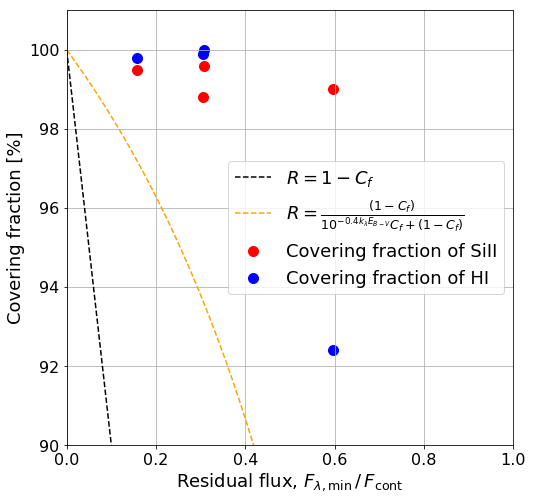

In [99]:
plt.figure(figsize=fig_size)
plt.scatter(res_flux[0:4],CF_SiII_5,label='Covering fraction of SiII',color='red',s=100)
plt.scatter(res_flux[0:4],CF_HI_5,label='Covering fraction of HI',color='blue',s=100)
plt.plot(x,100-100*x,label=r'$R = 1-C_f$',linestyle='--',color='black')
plt.plot(x,100*CF_caseB[0,:],label=r'$R = \frac{(1-C_f)}{10^{-0.4 k_{\lambda} E_{B-V}} C_f + (1-C_f)}$',linestyle='--',color='orange')
# plt.scatter(100*fesc_new_182,res_flux_182,label='average fesc = 5.3 %')
# plt.scatter(100*fesc_new_183,res_flux_183,label='average fesc = 1.0 %')
plt.xlabel(r'Residual flux, $F_{\lambda\mathrm{,min}} \,/ \, F_{\mathrm{cont}}$',fontsize=18)
plt.ylabel('Covering fraction [%]',fontsize=18)
plt.grid()
plt.tick_params(labelsize=16)
plt.xlim(0,1)
plt.ylim(90,101)
plt.legend(fontsize=18,loc='center right')
plt.savefig('/home/cral/mauerhofer/figures/paper/CD/R_CF.pdf')
plt.show()

# Compute flux

In [25]:
from astropy import units as u
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM,WMAP9

z = 3.8
dist = WMAP9.luminosity_distance(z).to(u.cm)
# print(dist)
factor = 4*np.pi*dist**2
lum = Fcont*u.erg/u.s/u.AA
cont_flux = lum/factor
print(cont_flux)

[2.06158366e-19 2.19979812e-19 2.88351235e-19 2.30232881e-19
 2.24949575e-19] erg / (Angstrom cm2 s)


2.958771924206512e+40


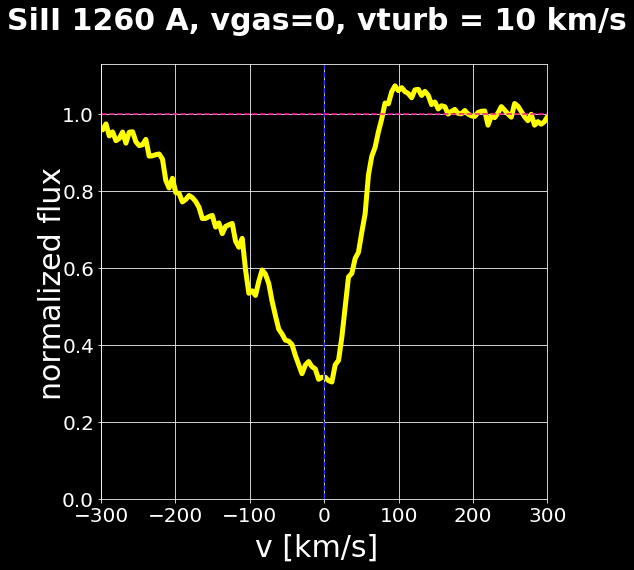

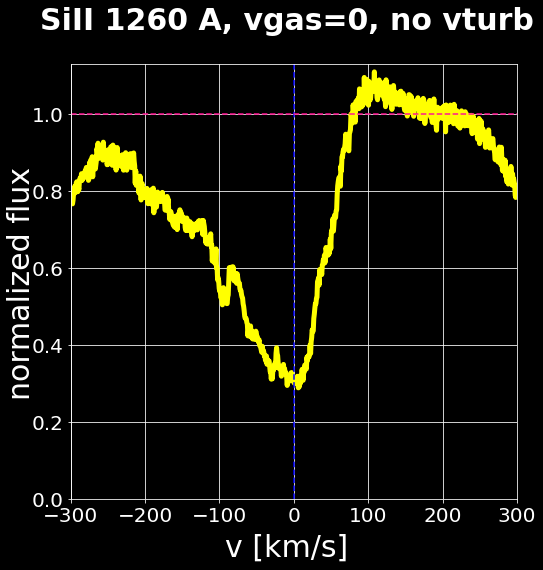

In [7]:
direc = 1
if(dark):
    plt.style.use('dark_background')
for direction in range(direc,direc+1):
    kobs = [k[direction-1][0], k[direction-1][1], k[direction-1][2]]
#     print(kobs)
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    fig.suptitle('SiII 1260 A, vgas=0, vturb = 10 km/s', size = 30, weight='bold')
    fig.text(0.5, 0.04, 'v [km/s]', va='center', ha='center', fontsize=30)
    fig.text(0.04, 0.5, 'normalized flux', va='center', ha='center', rotation='vertical', fontsize=30)
    a = []
    for j in range(1,noutput+1):
        a.append(po.mockobs('./00107/SiII/spectra_paper/', 'output_fid.out', 'IC_photons.ic', \
            load_spectrum=True, load_image=False, load_cube=False, idirection=direction))

#     spec_peeloff = 0
#     nPhotons = 0
#     for j in range(0,noutput):
#         spec_peeloff += a[j].spec*a[j].nPhotons
#         nPhotons += a[j].nPhotons
#     spec_peeloff = spec_peeloff[1:-1]/nPhotons
    spec_peeloff = a[0].spec[1:-1]
    l_peeloff = np.linspace(a[0].spec_lmin,a[0].spec_lmax,num=a[0].spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
#     v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    print(np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))]))
    spec_peeloff = spec_peeloff/np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/3e5*1260.42
    ax.plot(v_peeloff,spec_peeloff, color, linewidth=5)
    ax.axvline(0,color='blue',linestyle='--', label='v=0')
    ax.set_xlim(-300,300)
    ax.set_ylim(0.0, 1.13)
    ax.tick_params(labelsize=20)
    ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
#     ax.legend(loc='lower right',fontsize=18)
    ax.grid()
#     plt.savefig('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/plots/SiII_1260_fid_abs_dark_%i.pdf'%direction)
    plt.show()
    
if(dark):
    plt.style.use('dark_background')
for direction in range(direc,direc+1):
    kobs = [k[direction-1][0], k[direction-1][1], k[direction-1][2]]
#     print(kobs)
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    fig.suptitle('SiII 1260 A, vgas=0, no vturb', size = 30, weight='bold')
    fig.text(0.5, 0.04, 'v [km/s]', va='center', ha='center', fontsize=30)
    fig.text(0.04, 0.5, 'normalized flux', va='center', ha='center', rotation='vertical', fontsize=30)
    a = []
    for j in range(1,noutput+1):
        a.append(po.mockobs('./00107/SiII/spectra_paper/', 'output_zoom_abs.out', 'IC_photons_zoom_abs.ic', \
            load_spectrum=True, load_image=False, load_cube=False, idirection=direction))

#     spec_peeloff = 0
#     nPhotons = 0
#     for j in range(0,noutput):
#         spec_peeloff += a[j].spec*a[j].nPhotons
#         nPhotons += a[j].nPhotons
#     spec_peeloff = spec_peeloff[1:-1]/nPhotons
    spec_peeloff = a[0].spec[1:-1]
    l_peeloff = np.linspace(a[0].spec_lmin,a[0].spec_lmax,num=a[0].spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
#     v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    cont = 2.958771924206512e+40
#     print(np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))]))
#     spec_peeloff = spec_peeloff/np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
    spec_peeloff = spec_peeloff/cont
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/3e5*1260.42
    ax.plot(v_peeloff,spec_peeloff, color, linewidth=5)
    ax.axvline(0,color='blue',linestyle='--', label='v=0')
    ax.set_xlim(-300,300)
    ax.set_ylim(0.0, 1.13)
    ax.tick_params(labelsize=20)
    ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
#     ax.legend(loc='lower right',fontsize=18)
    ax.grid()
#     plt.savefig('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/plots/SiII_1260_fid_abs_dark_%i.pdf'%direction)
    plt.show()

3.152301877879806e+40


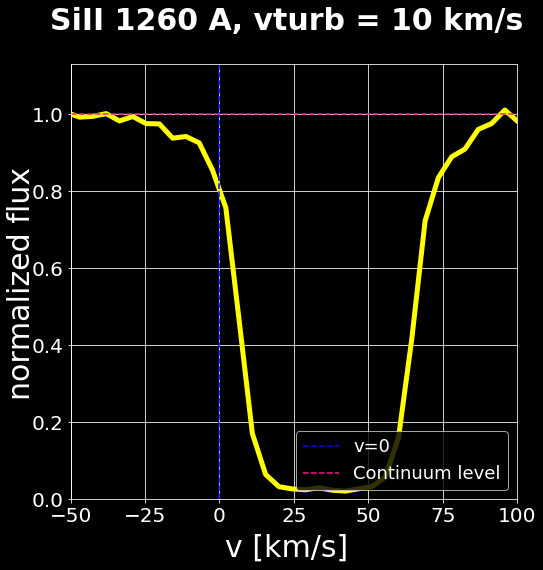

3.15229549269108e+40


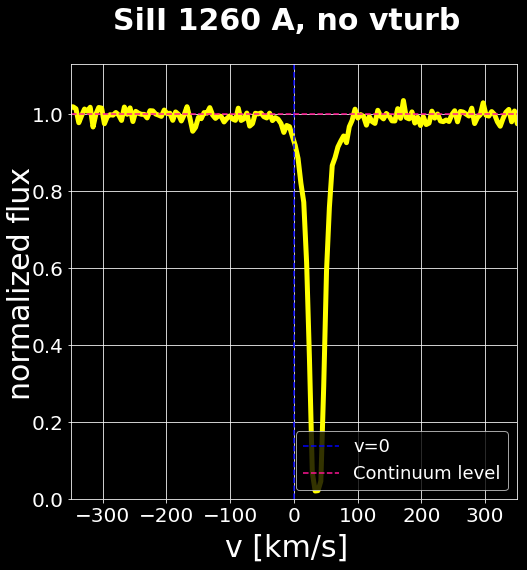

In [25]:
direc = 2
if(dark):
    plt.style.use('dark_background')
for direction in range(direc,direc+1):
    kobs = [k[direction-1][0], k[direction-1][1], k[direction-1][2]]
#     print(kobs)
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    fig.suptitle('SiII 1260 A, vturb = 10 km/s', size = 30, weight='bold')
    fig.text(0.5, 0.04, 'v [km/s]', va='center', ha='center', fontsize=30)
    fig.text(0.04, 0.5, 'normalized flux', va='center', ha='center', rotation='vertical', fontsize=30)
    a = []
    for j in range(1,noutput+1):
        a.append(po.mockobs('./00107/SiII/spectra_paper/', 'output_nov_vturb.out', 'IC_photons.ic', \
            load_spectrum=True, load_image=False, load_cube=False, idirection=direction))

    spec_peeloff = 0
    nPhotons = 0
    for j in range(0,noutput):
        spec_peeloff += a[j].spec*a[j].nPhotons
        nPhotons += a[j].nPhotons
    spec_peeloff = spec_peeloff[1:-1]/nPhotons
    l_peeloff = np.linspace(a[0].spec_lmin,a[0].spec_lmax,num=a[0].spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
    v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    print(np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))]))
    spec_peeloff = spec_peeloff/np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/3e5*1260.42
    ax.plot(v_peeloff,spec_peeloff, color, linewidth=5)
    ax.axvline(0,color='blue',linestyle='--', label='v=0')
    ax.set_xlim(-50,100)
    ax.set_ylim(0.0, 1.13)
    ax.tick_params(labelsize=20)
    ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
    ax.legend(loc='lower right',fontsize=18)
    ax.grid()
#     plt.savefig('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/plots/SiII_1260_fid_abs_dark_%i.pdf'%direction)
    plt.show()
    
if(dark):
    plt.style.use('dark_background')
for direction in range(direc,direc+1):
    kobs = [k[direction-1][0], k[direction-1][1], k[direction-1][2]]
#     print(kobs)
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    fig.suptitle('SiII 1260 A, no vturb', size = 30, weight='bold')
    fig.text(0.5, 0.04, 'v [km/s]', va='center', ha='center', fontsize=30)
    fig.text(0.04, 0.5, 'normalized flux', va='center', ha='center', rotation='vertical', fontsize=30)
    a = []
    for j in range(1,noutput+1):
        a.append(po.mockobs('./00107/SiII/spectra_paper/', 'output_nov.out', 'IC_photons.ic', \
            load_spectrum=True, load_image=False, load_cube=False, idirection=direction))

    spec_peeloff = 0
    nPhotons = 0
    for j in range(0,noutput):
        spec_peeloff += a[j].spec*a[j].nPhotons
        nPhotons += a[j].nPhotons
    spec_peeloff = spec_peeloff[1:-1]/nPhotons
    l_peeloff = np.linspace(a[0].spec_lmin,a[0].spec_lmax,num=a[0].spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
    v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    print(np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))]))
    spec_peeloff = spec_peeloff/np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/3e5*1260.42
    ax.plot(v_peeloff,spec_peeloff, color, linewidth=5)
    ax.axvline(0,color='blue',linestyle='--', label='v=0')
    ax.set_xlim(-350,350)
    ax.set_ylim(0.0, 1.13)
    ax.tick_params(labelsize=20)
    ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
    ax.legend(loc='lower right',fontsize=18)
    ax.grid()
#     plt.savefig('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/plots/SiII_1260_fid_abs_dark_%i.pdf'%direction)
    plt.show()

In [6]:
plt.figure(figsize=(14,14))

###########################################

plt.subplot(221)

for direction in range(1,2):
    kobs = [k[direction-1][0], k[direction-1][1], k[direction-1][2]]
    fig, plt = plt.subplots(1, 1, figsize=fig_size)
    fig.suptitle('SiII 1260 A, direction %i'%direction, size = 30, weight='bold')
    fig.text(0.5, 0.04, 'v [km/s]', va='center', ha='center', fontsize=30)
    fig.text(0.04, 0.5, 'normalized flux', va='center', ha='center', rotation='vertical', fontsize=30)
    a = []
    for j in range(1,noutput+1):
        a.append(po.mockobs('./00107/SiII/spectra_paper/', 'output_fid.out', 'IC_photons.ic', \
            load_spectrum=True, load_image=False, load_cube=False, idirection=direction))

    spec_peeloff = 0
    nPhotons = 0
    for j in range(0,noutput):
        spec_peeloff += a[j].spec*a[j].nPhotons
        nPhotons += a[j].nPhotons
    spec_peeloff = spec_peeloff[1:-1]/nPhotons
    l_peeloff = np.linspace(a[0].spec_lmin,a[0].spec_lmax,num=a[0].spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
    v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    spec_peeloff = spec_peeloff/np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/3e5*1260.42

    plt.plot(v_peeloff,spec_peeloff, color)
    plt.axvline(0,color='blue',linestyle='--', label='v=0')
    plt.set_xlim(-350,350)
    plt.set_ylim(0.0, 1.1)
    plt.tick_params(labelsize=16)
#     plt.plthline(1,color='deeppink',linestyle='--', label='Continuum level')
    plt.legend(loc='lower right',fontsize=18)
    plt.grid()
# plt.set(xlabel='T (K)', ylabel='%s ionization fractions'%elements_name_long[Z[i]-1])
# plt.xlabel('T (K)',fontsize=18)
# plt.ylabel('%s ionization fractions'%elements_name_long[Z[i]-1],fontsize=18)
# plt.tick_params(labelsize=12)
# plt.xlim(2e3, 2e5)
# plt.ylim(1e-2,1e0)
# plt.grid()
# plt.annotate('%s'%elements_name_long[Z[i]-1], xy=(2.3e3, 0.7), fontsize=19)

# ###########################################

# plt.subplot(222)
# i=1
# n = min(Z[i]+1, mplt_lines)
# for j in range(n):
#     plt.loglog(temperature, cloudy[int(orderCloudy(Z[i],j))]/densities[Z[i]-1], color=colors[j], label='%s%s Cloudy'%(elements_name[Z[i]-1],roman[j]))
#     plt.loglog(temperature, krome[int(orderKrome(Z[i],j))], color=colors[j], linestyle='--', label='%s%s Krome'%(elements_name[Z[i]-1],roman[j]))
    
# #plt.set(xlabel='T (K)', ylabel='%s ionization fractions'%elements_name_long[Z[i]-1])
# plt.xlabel('T (K)',fontsize=18)
# plt.ylabel('%s ionization fractions'%elements_name_long[Z[i]-1],fontsize=18)
# plt.tick_params(labelsize=12)
# plt.xlim(2e3, 2e5)
# plt.ylim(1e-2,1e0)
# plt.grid()
# plt.annotate('%s'%elements_name_long[Z[i]-1], xy=(2.3e3, 0.7), fontsize=19)

# ###########################################

# plt.subplot(223)
# i=2
# n = min(Z[i]+1, mplt_lines)
# for j in range(n):
#     plt.loglog(temperature, cloudy[int(orderCloudy(Z[i],j))]/densities[Z[i]-1], color=colors[j], label='%s%s Cloudy'%(elements_name[Z[i]-1],roman[j]))
#     plt.loglog(temperature, krome[int(orderKrome(Z[i],j))], color=colors[j], linestyle='--', label='%s%s Krome'%(elements_name[Z[i]-1],roman[j]))
    
# #plt.set(xlabel='T (K)', ylabel='%s ionization fractions'%elements_name_long[Z[i]-1])
# plt.xlabel('T (K)',fontsize=18)
# plt.ylabel('%s ionization fractions'%elements_name_long[Z[i]-1],fontsize=18)
# plt.tick_params(labelsize=12)
# plt.xlim(2e3, 2e5)
# plt.ylim(1e-2,1e0)
# plt.grid()
# plt.annotate('%s'%elements_name_long[Z[i]-1], xy=(2.3e3, 0.7), fontsize=19)

# ###########################################

# plt.subplot(224)
# i=3
# n = min(Z[i]+1, mplt_lines)
# for j in range(n):
#     plt.loglog(temperature, cloudy[int(orderCloudy(Z[i],j))]/densities[Z[i]-1], color=colors[j], label='%s%s Cloudy'%(elements_name[Z[i]-1],roman[j]))
#     plt.loglog(temperature, krome[int(orderKrome(Z[i],j))], color=colors[j], linestyle='--', label='%s%s Krome'%(elements_name[Z[i]-1],roman[j]))
    
# #plt.set(xlabel='T (K)', ylabel='%s ionization fractions'%elements_name_long[Z[i]-1])
# plt.xlabel('T (K)',fontsize=18)
# plt.ylabel('%s ionization fractions'%elements_name_long[Z[i]-1],fontsize=18)
# plt.tick_params(labelsize=12)
# plt.xlim(2e3, 2e5)
# plt.ylim(1e-2,1e0)
# plt.grid()
# plt.annotate('%s'%elements_name_long[Z[i]-1], xy=(2.3e3, 0.7), fontsize=19)


# name = 'all_new'
# plt.savefig('/Users/mauerhof/Documents/Papers/MyPaper/covering/figures/compCloudyKrome/%s.pdf'%name,  inches_boundary='tight')
plt.show()



TypeError: 'Figure' object is not callable

In [8]:
if(dark):
    plt.style.use('dark_background')
for direction in range(1,1):
    kobs = [k[direction-1][0], k[direction-1][1], k[direction-1][2]]
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    fig.suptitle('SiII 1260 A, direction %i'%direction, size = 30, weight='bold')
    fig.text(0.5, 0.04, 'v [km/s]', va='center', ha='center', fontsize=30)
    fig.text(0.04, 0.5, 'normalized flux', va='center', ha='center', rotation='vertical', fontsize=30)
    a = []
    for j in range(1,noutput+1):
        a.append(po.mockobs('./00107/SiII/spectra_paper/', 'output_fid.out', 'IC_photons.ic', \
            load_spectrum=True, load_image=False, load_cube=False, idirection=direction))

    spec_peeloff = 0
    nPhotons = 0
    for j in range(0,noutput):
        spec_peeloff += a[j].spec*a[j].nPhotons
        nPhotons += a[j].nPhotons
    spec_peeloff = spec_peeloff[1:-1]/nPhotons
    l_peeloff = np.linspace(a[0].spec_lmin,a[0].spec_lmax,num=a[0].spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
    v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    spec_peeloff = spec_peeloff/np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/3e5*1260.42
    ax.plot(v_peeloff,spec_peeloff, color, linewidth=5)
    ax.axvline(0,color='blue',linestyle='--', label='v=0')
    ax.set_xlim(-350,350)
    ax.set_ylim(0.0, 1.1)
    ax.tick_params(labelsize=20)
    ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
    ax.legend(loc='lower right',fontsize=18)
    ax.grid()
#     plt.savefig('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/plots/SiII_1260_fid_abs_dark_%i.pdf'%direction)
    plt.show()

# Fiducial

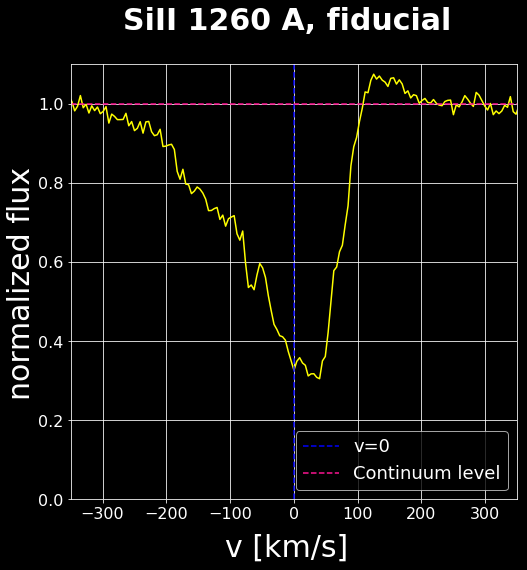

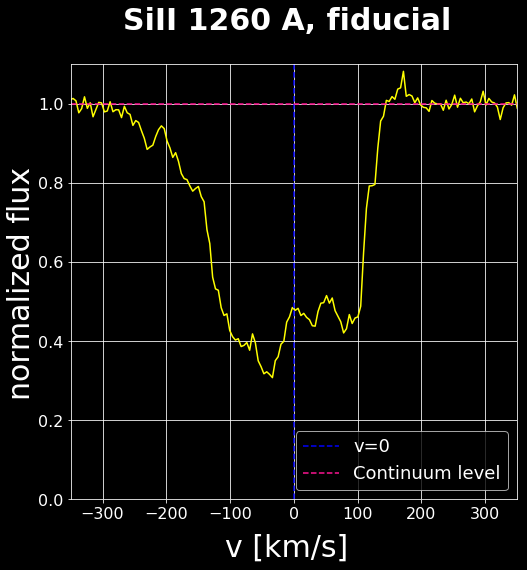

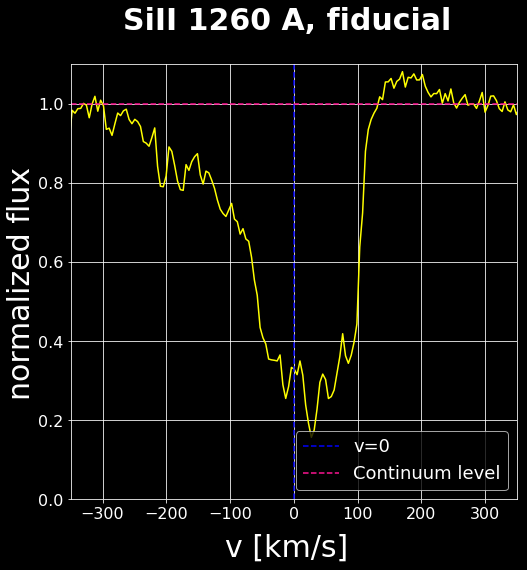

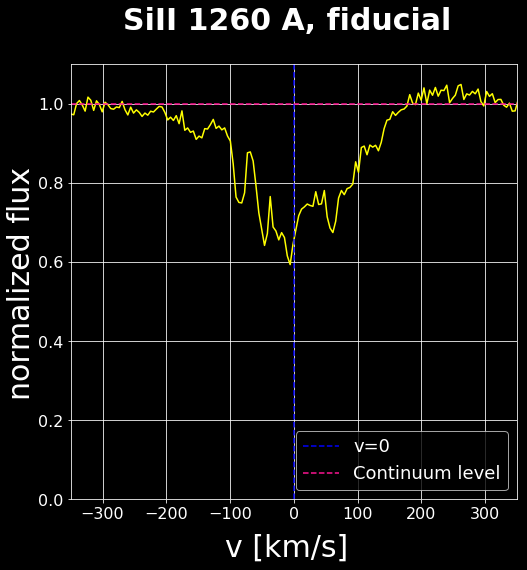

In [9]:
for direction in range(1,5):
    kobs = [k[direction-1][0], k[direction-1][1], k[direction-1][2]]
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    fig.suptitle('SiII 1260 A, fiducial', size = 30, weight='bold')
    fig.text(0.5, 0.04, 'v [km/s]', va='center', ha='center', fontsize=30)
    fig.text(0.04, 0.5, 'normalized flux', va='center', ha='center', rotation='vertical', fontsize=30)
    a = []
    for j in range(1,noutput+1):
        a.append(po.mockobs('./00107/SiII/spectra_paper/', 'output_fid.out', 'IC_photons.ic', \
            load_spectrum=True, load_image=False, load_cube=False, idirection=direction))

    spec_peeloff = 0
    nPhotons = 0
    for j in range(0,noutput):
        spec_peeloff += a[j].spec*a[j].nPhotons
        nPhotons += a[j].nPhotons
    spec_peeloff = spec_peeloff[1:-1]/nPhotons
    l_peeloff = np.linspace(a[0].spec_lmin,a[0].spec_lmax,num=a[0].spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
    v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    spec_peeloff = spec_peeloff/np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/3e5*1260.42
    ax.plot(v_peeloff,spec_peeloff, color)
    ax.axvline(0,color='blue',linestyle='--', label='v=0')
    ax.set_xlim(-350,350)
    ax.set_ylim(0.0, 1.1)
    ax.tick_params(labelsize=16)
    ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
    ax.legend(loc='lower right',fontsize=18)
    ax.grid()
    plt.savefig('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/plots/SiII_1260_fid_abs_%i.pdf'%direction)
#plt.show()

# Without Dust 

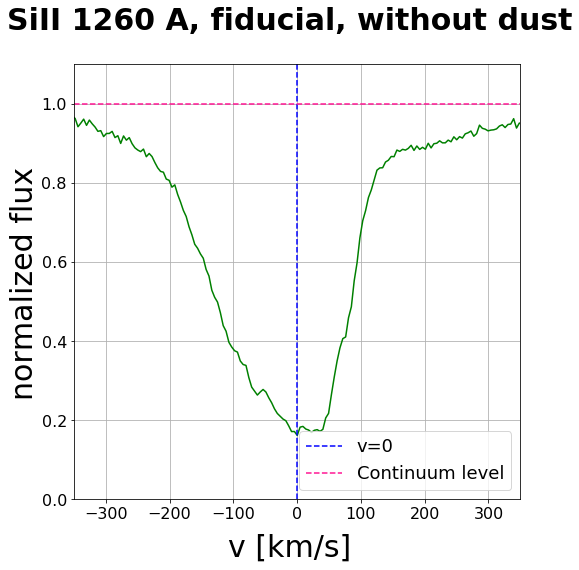

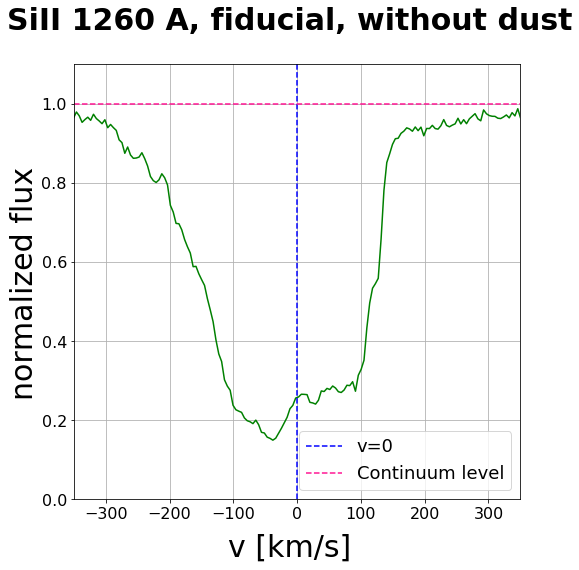

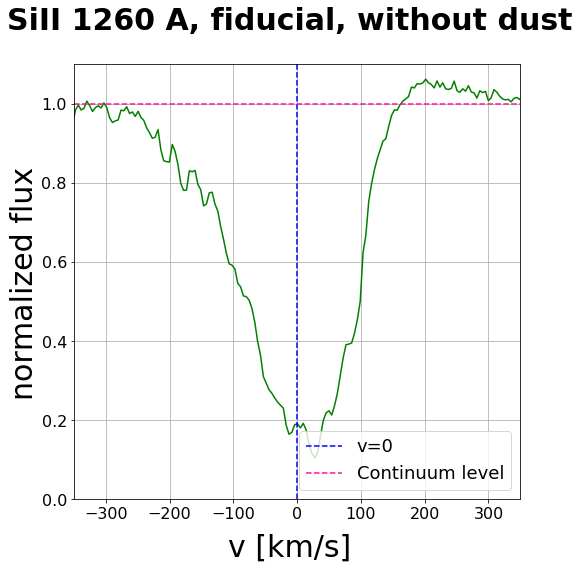

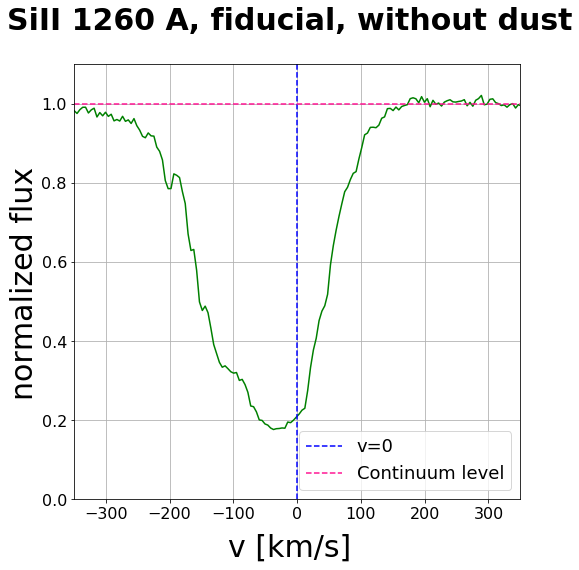

In [18]:
for direction in range(1,5):
    kobs = [k[direction-1][0], k[direction-1][1], k[direction-1][2]]
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    fig.suptitle('SiII 1260 A, fiducial, without dust', size = 30, weight='bold')
    fig.text(0.5, 0.04, 'v [km/s]', va='center', ha='center', fontsize=30)
    fig.text(0.04, 0.5, 'normalized flux', va='center', ha='center', rotation='vertical', fontsize=30)
    a = []
    for j in range(1,noutput+1):
        a.append(po.mockobs('./00107/SiII/spectra_paper/', 'output_nodust.out', 'IC_photons.ic', \
            load_spectrum=True, load_image=False, load_cube=False, idirection=direction))

    spec_peeloff = 0
    nPhotons = 0
    for j in range(0,noutput):
        spec_peeloff += a[j].spec*a[j].nPhotons
        nPhotons += a[j].nPhotons
    spec_peeloff = spec_peeloff[1:-1]/nPhotons
    l_peeloff = np.linspace(a[0].spec_lmin,a[0].spec_lmax,num=a[0].spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
    v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    spec_peeloff = spec_peeloff/np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/3e5*1260.42
    ax.plot(v_peeloff,spec_peeloff, color)
    ax.axvline(0,color='blue',linestyle='--', label='v=0')
    ax.set_xlim(-350,350)
    ax.set_ylim(0.0, 1.1)
    ax.tick_params(labelsize=16)
    ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
    ax.legend(loc='lower right',fontsize=18)
    ax.grid()
    plt.savefig('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/plots/SiII_1260_nodust_abs_%i.pdf'%direction)
    #plt.show()

# Without Dust nor v

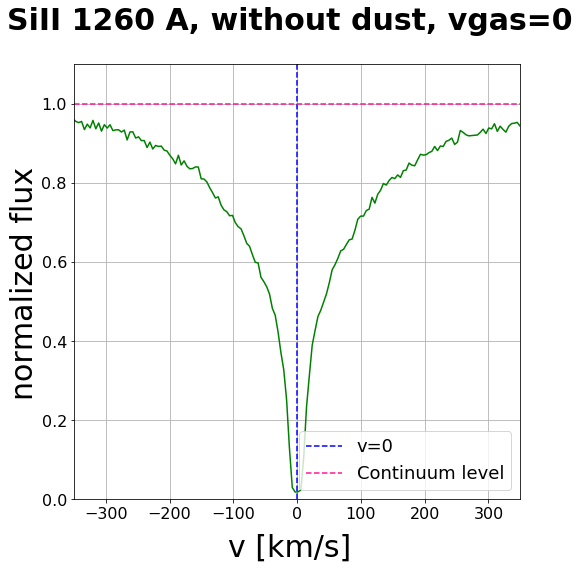

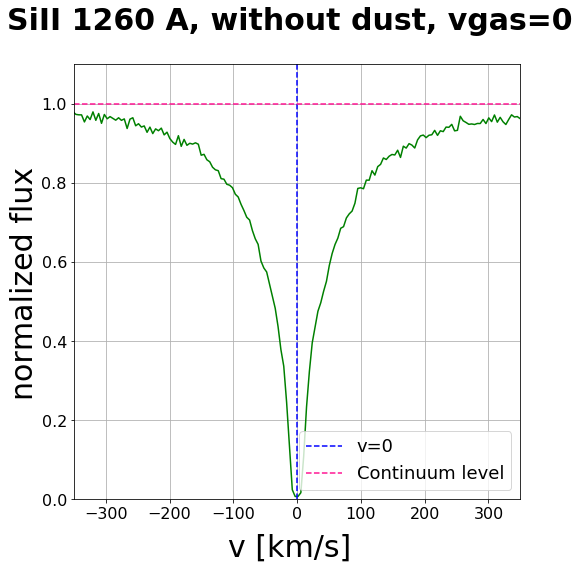

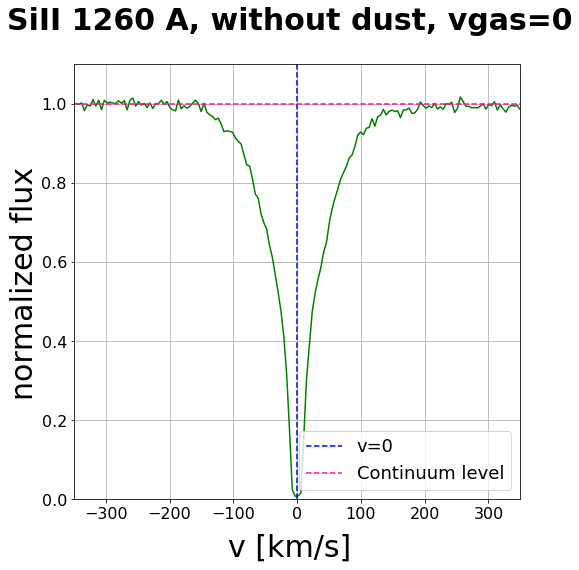

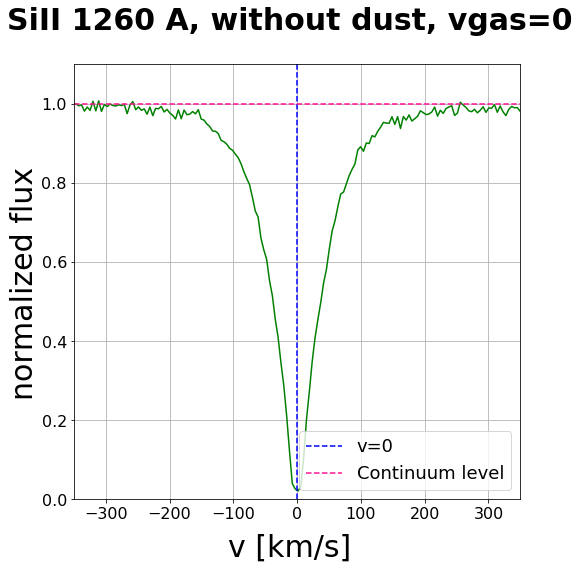

In [19]:
for direction in range(1,5):
    kobs = [k[direction-1][0], k[direction-1][1], k[direction-1][2]]
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    fig.suptitle('SiII 1260 A, without dust, vgas=0', size = 30, weight='bold')
    fig.text(0.5, 0.04, 'v [km/s]', va='center', ha='center', fontsize=30)
    fig.text(0.04, 0.5, 'normalized flux', va='center', ha='center', rotation='vertical', fontsize=30)
    a = []
    for j in range(1,noutput+1):
        a.append(po.mockobs('./00107/SiII/spectra_paper/', 'output_nov_nodust.out', 'IC_photons.ic', \
            load_spectrum=True, load_image=False, load_cube=False, idirection=direction))

    spec_peeloff = 0
    nPhotons = 0
    for j in range(0,noutput):
        spec_peeloff += a[j].spec*a[j].nPhotons
        nPhotons += a[j].nPhotons
    spec_peeloff = spec_peeloff[1:-1]/nPhotons
    l_peeloff = np.linspace(a[0].spec_lmin,a[0].spec_lmax,num=a[0].spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
    spec_peeloff = spec_peeloff/np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/3e5*1260.42
    ax.plot(v_peeloff,spec_peeloff, color)
    ax.axvline(0,color='blue',linestyle='--', label='v=0')
    ax.set_xlim(-350,350)
    ax.set_ylim(0.0, 1.1)
    ax.tick_params(labelsize=16)
    ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
    ax.legend(loc='lower right',fontsize=18)
    ax.grid()
    plt.savefig('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/plots/SiII_1260_nov_nodust_abs_%i.pdf'%direction)
    #plt.show()

# no v 

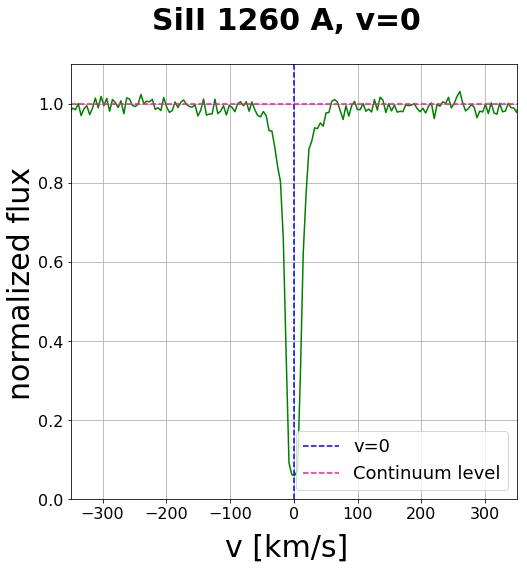

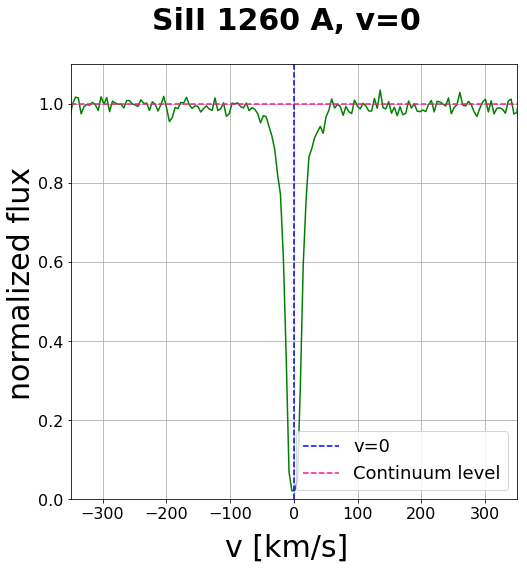

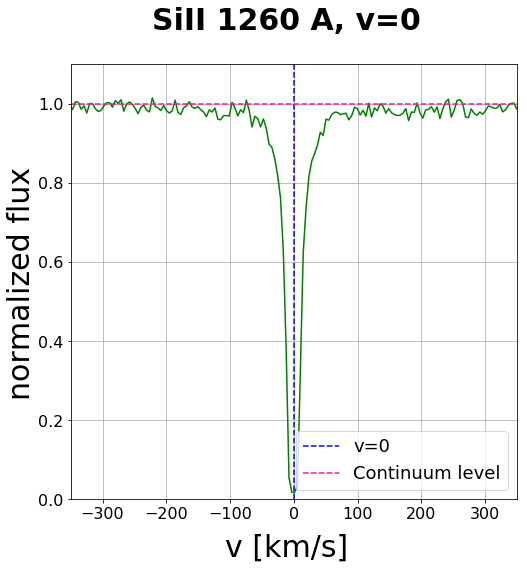

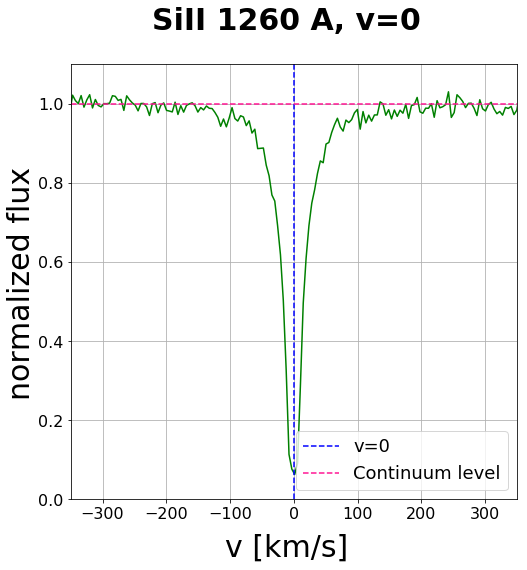

In [20]:
for direction in range(1,5):
    kobs = [k[direction-1][0], k[direction-1][1], k[direction-1][2]]
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    fig.suptitle('SiII 1260 A, v=0', size = 30, weight='bold')
    fig.text(0.5, 0.04, 'v [km/s]', va='center', ha='center', fontsize=30)
    fig.text(0.04, 0.5, 'normalized flux', va='center', ha='center', rotation='vertical', fontsize=30)
    a = []
    for j in range(1,noutput+1):
        a.append(po.mockobs('./00107/SiII/spectra_paper/', 'output_nov.out', 'IC_photons.ic', \
            load_spectrum=True, load_image=False, load_cube=False, idirection=direction))

    spec_peeloff = 0
    nPhotons = 0
    for j in range(0,noutput):
        spec_peeloff += a[j].spec*a[j].nPhotons
        nPhotons += a[j].nPhotons
    spec_peeloff = spec_peeloff[1:-1]/nPhotons
    l_peeloff = np.linspace(a[0].spec_lmin,a[0].spec_lmax,num=a[0].spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
    spec_peeloff = spec_peeloff/np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/3e5*1260.42
    ax.plot(v_peeloff,spec_peeloff, color)
    ax.axvline(0,color='blue',linestyle='--', label='v=0')
    ax.set_xlim(-350,350)
    ax.set_ylim(0.0, 1.1)
    ax.tick_params(labelsize=16)
    ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
    ax.legend(loc='lower right',fontsize=18)
    ax.grid()
    plt.savefig('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/plots/SiII_1260_nov_abs_%i.pdf'%direction)
    #plt.show()

# No scattering

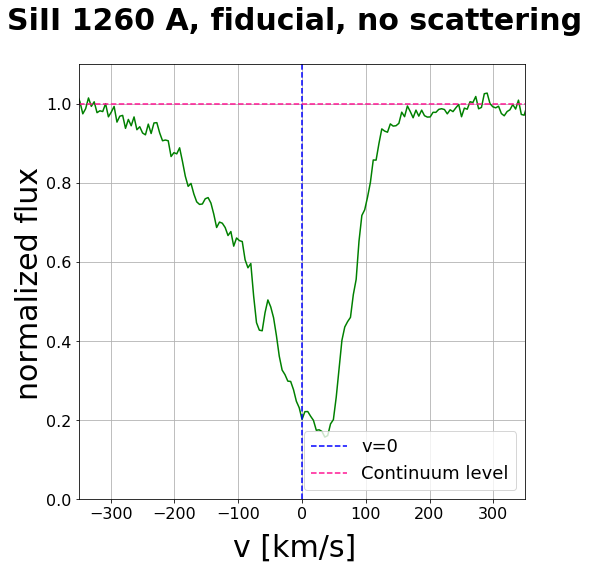

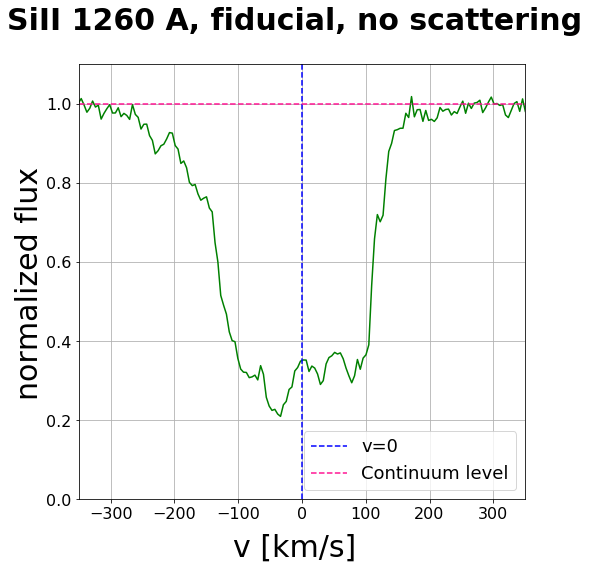

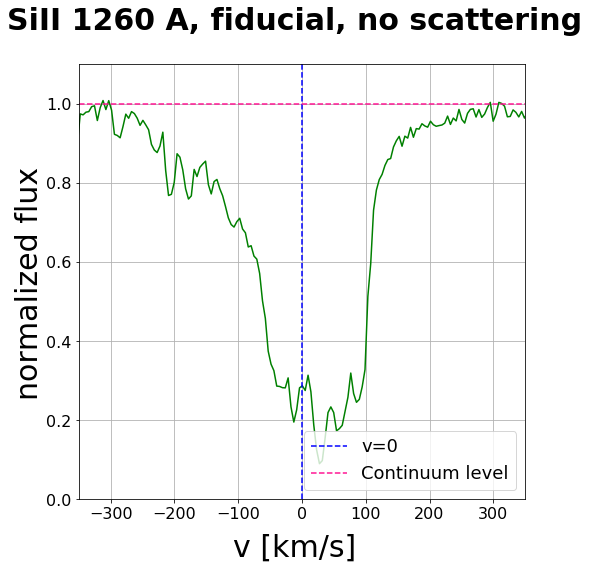

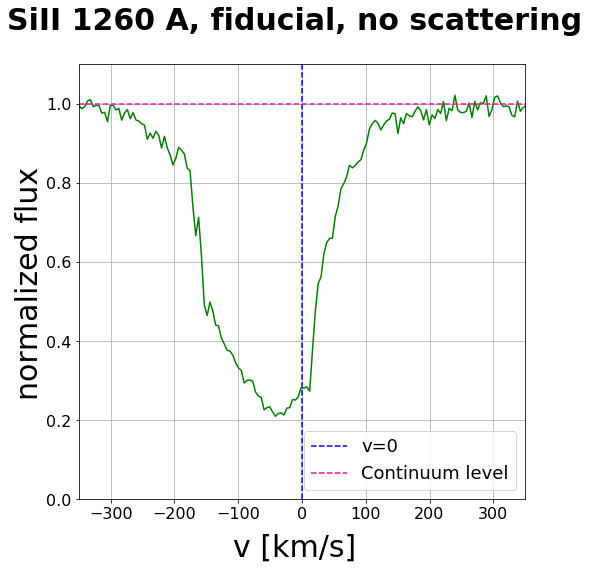

In [21]:
for direction in range(1,5):
    kobs = [k[direction-1][0], k[direction-1][1], k[direction-1][2]]
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    fig.suptitle('SiII 1260 A, fiducial, no scattering', size = 30, weight='bold')
    fig.text(0.5, 0.04, 'v [km/s]', va='center', ha='center', fontsize=30)
    fig.text(0.04, 0.5, 'normalized flux', va='center', ha='center', rotation='vertical', fontsize=30)
    a = []
    for j in range(1,noutput+1):
        a.append(po.mockobs('./00107/SiII/spectra_paper/', 'output_noscat.out', 'IC_photons.ic', \
            load_spectrum=True, load_image=False, load_cube=False, idirection=direction))

    spec_peeloff = 0
    nPhotons = 0
    for j in range(0,noutput):
        spec_peeloff += a[j].spec*a[j].nPhotons
        nPhotons += a[j].nPhotons
    spec_peeloff = spec_peeloff[1:-1]/nPhotons
    l_peeloff = np.linspace(a[0].spec_lmin,a[0].spec_lmax,num=a[0].spec_npix)[1:-1]  # [A]
    v_peeloff = c.c_cgs*(l_peeloff-line)/line*1e-5
    v_peeloff = v_peeloff + np.dot(kobs,v_cm)
    spec_peeloff = spec_peeloff/np.average(spec_peeloff[np.where((v_peeloff>-900) & (v_peeloff<-700))])
    l_peeloff = l_peeloff + np.dot(kobs,v_cm)/3e5*1260.42
    ax.plot(v_peeloff,spec_peeloff, color)
    ax.axvline(0,color='blue',linestyle='--', label='v=0')
    ax.set_xlim(-350,350)
    ax.set_ylim(0.0, 1.1)
    ax.tick_params(labelsize=16)
    ax.axhline(1,color='deeppink',linestyle='--', label='Continuum level')
    ax.legend(loc='lower right',fontsize=18)
    ax.grid()
    plt.savefig('/cral/mauerhofer/RascasFiles/simu_jeremy/00107/SiII/spectra_paper/plots/SiII_1260_noscat_abs_%i.pdf'%direction)
    #plt.show()